In [1]:
import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [2]:
train_img_path = "./car_img_dataset/training_images"
test_img_path = "./car_img_dataset/testing_images"

In [3]:
df = pd.read_csv("./car_img_dataset/train_solution_bounding_boxes.csv")
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [66]:
df1 = df.copy()
df1['class'] = 0
df1['bboxes'] = df1[['xmin', 'ymin', 'xmax', 'ymax']].apply(list, axis=1)
df1 = df1.drop(columns=['xmin', 'ymin', 'xmax', 'ymax']).groupby('image', as_index=False).agg(list)

df1.to_csv('new_df1.csv')

In [67]:
df1

,image,class,bboxes
0,vid_4_1000.jpg,[0],"[[281.2590449, 187.0350708, 327.7279305, 223.2..."
1,vid_4_10000.jpg,[0],"[[15.16353111, 187.0350708, 120.3299566, 236.4..."
2,vid_4_10020.jpg,[0],"[[496.4833575, 172.3632561, 630.0202605, 231.5..."
3,vid_4_10040.jpg,[0],"[[239.1924747, 176.7648005, 361.9681621, 236.4..."
4,vid_4_10060.jpg,[0],"[[16.63096961, 186.5460103, 132.5586107, 238.3..."
...,...,...,...
350,vid_4_9860.jpg,[0],"[[0.0, 198.3217293, 49.23525127, 236.2232837]]"
351,vid_4_9880.jpg,[0],"[[329.8761835, 156.482351, 536.6642389, 250.49..."
352,vid_4_9900.jpg,[0],"[[0.0, 168.2958225, 141.7975237, 239.1766516]]"
353,vid_4_9960.jpg,[0],"[[487.4289876, 172.2336464, 616.9176985, 228.8..."


In [101]:
from random import randint
import matplotlib.patches as patches
def draw_img_with_box(df_index):
    color = (113, 252, 170)
    img = cv2.imread(train_img_path +"/"+ df1.iloc[df_index]['image'])
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    # fig, ax = plt.subplots(figsize=(8, 5))
    boxes = df1.loc[df_index, 'bboxes']
    # print(boxes)
    for bbox in boxes:
        plt.subplots(5, 2)
        rect = patches.Rectangle((int(bbox[0]), int(bbox[1])), int(bbox[2]) - int(bbox[0]), int(bbox[3]) - int(bbox[1]),
                                 linewidth=1.5, edgecolor='#7CFFBB', facecolor='none')
        ax.add_patch(rect)
        cv2.putText(img, 'Car', (int(bbox[0]), int(bbox[1]) - 10), cv2.FONT_ITALIC, 1, color, 2)
    plt.imshow(img)
    plt.title(df1.loc[df_index, 'image'])
    plt.axis('off')
    plt.show()

NameError: name 'ax' is not defined

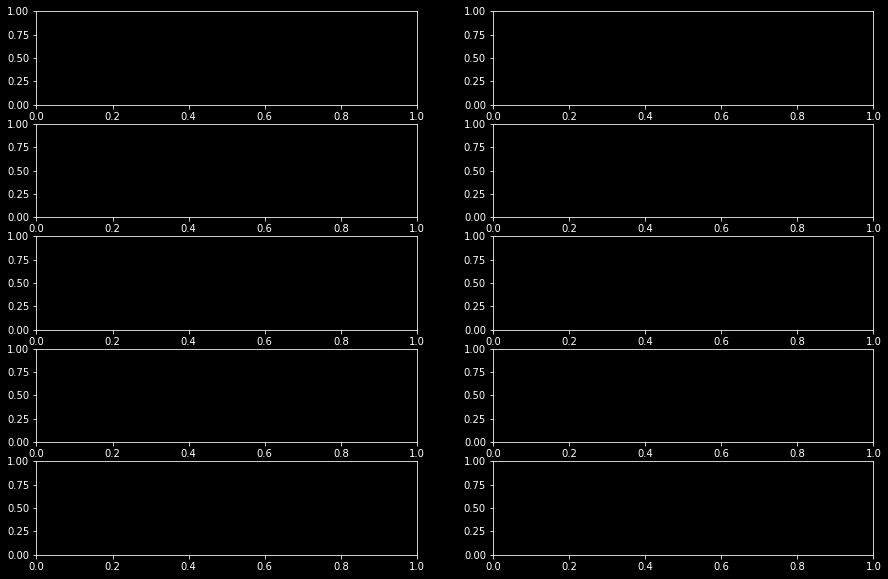

In [102]:
for _ in range(5):
    draw_img_with_box(randint(0, len(df1)))